In [60]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Uploading training and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

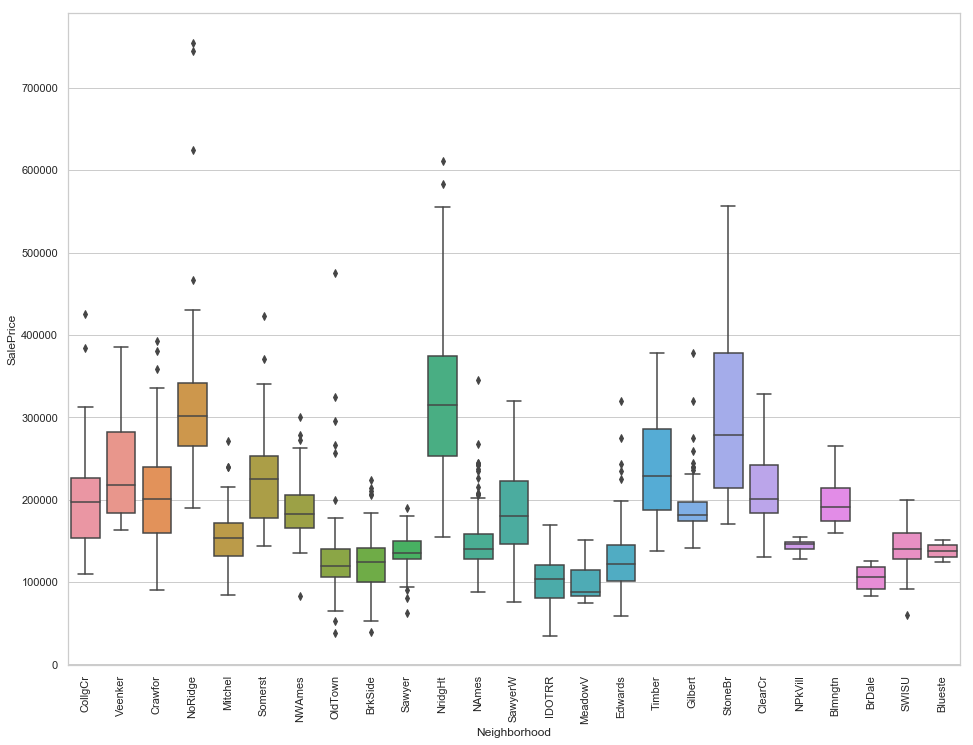

In [16]:
# Relation between Neighnorhood and price
plt.figure(figsize=(16,12))
sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'])
plt.xticks(rotation = 90)

Ofcourse neighborhood is an important factor which change house prices

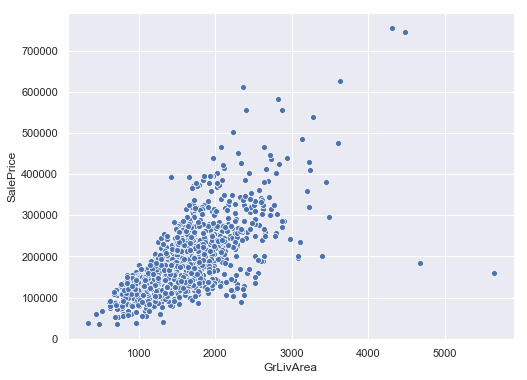

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x= 'GrLivArea', y= 'SalePrice', data= train)

There is a positive linear relationship between Ground living area and Sale price

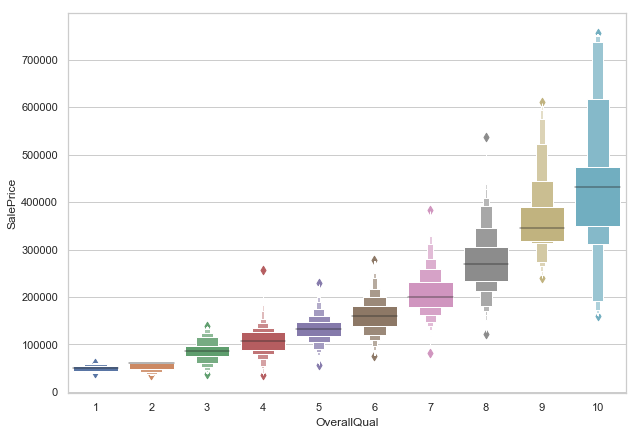

In [18]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxenplot(x= 'OverallQual', y= 'SalePrice', data=train)

Over all qualifications has an important rule in setting price, Houses with highest 
qualifications have highest prices "Positive linear relation"

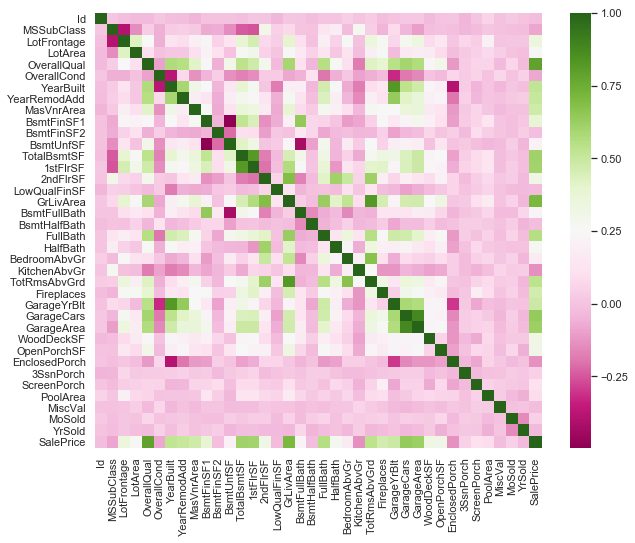

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corrmat = train.corr()
sns.heatmap(corrmat, ax=ax, cmap= 'PiYG')

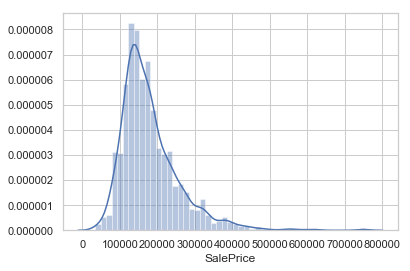

In [23]:
# check if the SalePrice follow a normal distribution
sns.set_style('whitegrid')
sns.distplot(train['SalePrice'])

In [24]:
# getting log of SalesPrice so data will follow normal distribution
train['SalePrice'] = np.log1p(train['SalePrice'])

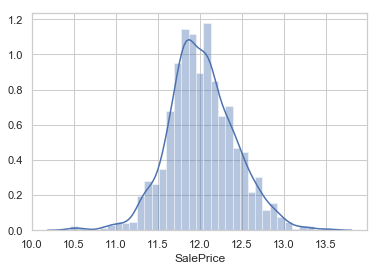

In [25]:
sns.set_style('whitegrid')
sns.distplot(train['SalePrice'])

In [26]:
# Saving Ids then dropping them as they will not be part of our analysis

train_id = train['Id']
test_id = test['Id']

train.drop('Id', axis= 1, inplace= True)
test.drop('Id', axis= 1, inplace= True)

In [27]:
# Saving length of training data and defining y variable
ntrain = len(train)
ntest = len(test)
y = train['SalePrice']
train.drop('SalePrice', axis= 1, inplace= True)

In [28]:
train.shape, y.shape, test.shape

((1460, 79), (1460,), (1459, 79))

In [29]:
#preparing data for handling missing values and feature engineering
all_data = pd.concat([train, test])
all_data.shape

(2919, 79)

In [30]:
# missing values
missing_percentage = (all_data.isnull().sum() / len(all_data))
missing_percentage = missing_percentage.drop(missing_percentage[missing_percentage == 0].index).sort_values(ascending = False)
missing_values = pd.DataFrame({'Percentage': missing_percentage})
missing_values.head()

,Percentage
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468


In [31]:
missing_values.shape[0]

34

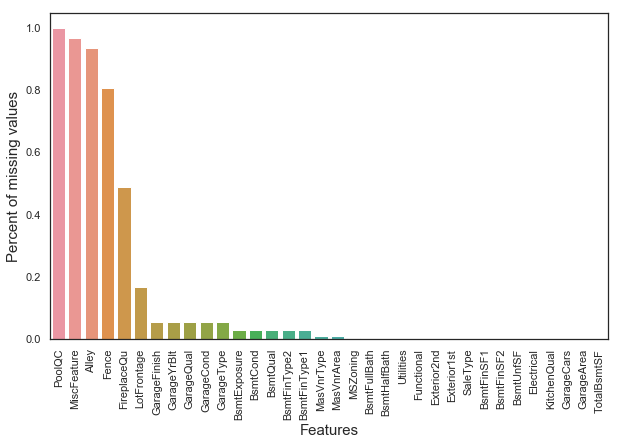

In [32]:
sns.set_style('white')
f, ax = plt.subplots(figsize= (10, 6))
plt.xticks(rotation = 90)
sns.barplot(x= missing_values.index, y= missing_values['Percentage'])
plt.xlabel('Features', fontsize= 15)
plt.ylabel('Percent of missing values', fontsize= 15)
plt.show()

In [33]:
missing_values.info

<bound method DataFrame.info of               Percentage
PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343>

# handling missing values
Starting with (PoolQC), Null values usually means no pool

In [34]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None') 

In [35]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [36]:
# doing same for other categorical features features
cat_feats = all_data.dtypes[all_data.dtypes == 'object'].index

In [37]:
for c in cat_feats:
    all_data[c] = all_data[c].fillna('None')

In [38]:
# Usually null at numerical values means zero, So I'll replace null values with Zero for all numerical values
num_feats = all_data.dtypes[all_data.dtypes != 'object'].index

for n in num_feats:
    all_data[n] = all_data[n].fillna(0)

In [39]:
all_data.isnull().sum().sum()

0

Our data doesn't contain any null values

In [40]:
# change values with numerical values which is actually should be categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [41]:
# Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
for c in cat_feats:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

all_data.shape

(2919, 79)

In [43]:
# checking skewness of numerical values
from scipy.stats import skew

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending = False)
skewness = pd.DataFrame({'Skewness': skewed_feats})
skewness.head()

,Skewness
Utilities,33.973482
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761


In [44]:
# choosing boxcox transformation for highly sklewed features
skewness = skewness[abs(skewness) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [45]:
# making model ready for modeling by getting dummies of categorical variables
all_data = pd.get_dummies(all_data)

In [46]:
all_data.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1.820334,5.831328,19.212182,0.730463,0.730463,1.540963,1.540963,0.0,1.820334,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.820334,6.221214,19.712205,0.730463,0.730463,1.540963,1.540963,0.0,1.194318,0.0,...,1,0,0,0,0,0,1,0,0,0
2,1.820334,5.914940,20.347241,0.730463,0.730463,0.000000,1.540963,0.0,1.820334,0.0,...,0,0,0,0,1,0,0,1,0,0
3,1.820334,5.684507,19.691553,0.730463,0.730463,0.000000,1.540963,0.0,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1.820334,6.314735,21.325160,0.730463,0.730463,0.000000,1.540963,0.0,1.194318,0.0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Splitting data into train and test
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
X_train.shape, y.shape, X_test.shape

((1460, 117), (1460,), (1459, 117))

In [66]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [49]:
# defining cross validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle= True)
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [53]:
rfr_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()

In [61]:
score = rmse_cv(rfr_model)
print('Random Forest score: {}'.format(score.mean()))

Random Forest score: 0.15452214874133158


In [63]:
score = rmse_cv(gbr_model)
print('Gradient boosting score: {}'.format(score.mean()))

Gradient boosting score: 0.13082242392630414


In [64]:
score = rmse_cv(xgb_model)
print('XGB regressor {}'.format(score.mean()))

XGB regressor 0.13729098492822125


In [65]:
score = rmse_cv(lgb_model)
print('LGBM score: {}'.format(score.mean()))

LGBM score: 0.1403217534927284


In [67]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [69]:
# choosing to submit solution using Gradient boosting as it shows lowest score
gbr_model.fit(X_train, y)
gbr_train_predict = gbr_model.predict(X_train)
gbr_predict = np.expm1(gbr_model.predict(X_test))
print(rmsle(y, gbr_train_predict))

0.08501474781375058


In [70]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = gbr_predict
sub.to_csv('my_model.csv', index= False)